In [163]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack
import processing_signals as ps
import padasip as pa

# plt.figure(figsize=(10, 7))

In [164]:
model = np.load("MODEL.NPY")
model_agc = np.load("MODEL_AGC.NPY")
gather = np.load("GATHER.NPY")

print(model.shape, model_agc.shape, gather.shape)

(96, 2001) (96, 2001) (96, 2001)


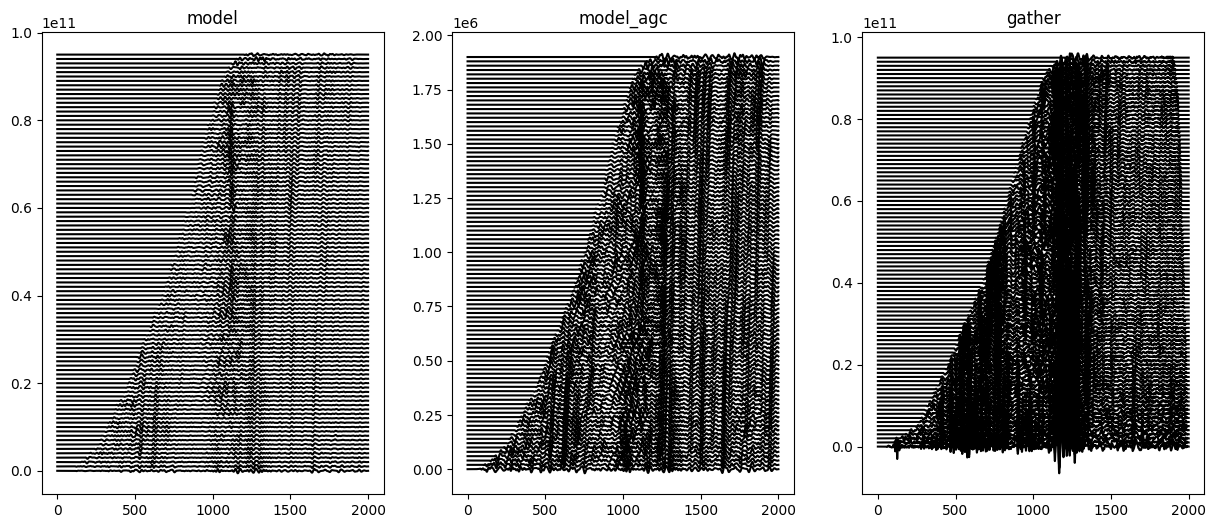

In [165]:
plt.figure(figsize=(15, 6))


shift = 1e+9
plt.subplot(1, 3, 1)
plt.title("model")
for i in range(96):
    plt.plot(shift * i + model[i], color='black')

shift_agc = 1e+5 / 5
plt.subplot(1, 3, 2)
plt.title("model_agc")
for i in range(96):
    plt.plot(shift_agc * i + model_agc[i], color='black')


plt.subplot(1, 3, 3)
plt.title("gather")
for i in range(96):
    plt.plot(shift * i + gather[i], color='black')

plt.show()

Для примера возьмем конкретную трассу

При некоторых значения, например number_trace = 2, хоть RLS и дает более верный сигнал на выходе, но NMSE у него хуже

In [166]:
number_trace = 1

# Мой NLMS метод:

In [167]:
approx_real_weights_1d_nlms = ps.fitting_of_NLMS(model_agc[number_trace], gather[number_trace], 2, 0.5, 1)
print(approx_real_weights_1d_nlms, approx_real_weights_1d_nlms.shape)

[ 1.14476873e+01 -2.76464419e+05] (2,)


In [168]:
approx_real_signal_1d_nlms = ps.processing_of_signal(model_agc[number_trace], approx_real_weights_1d_nlms)

# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_nlms, model[number_trace]):.1e}") 
print(f"MSE = {ps.MSE(approx_real_signal_1d_nlms, model[number_trace]):.10e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_nlms, model[number_trace]):.1e}") 
print(f"ME = {ps.ME(approx_real_signal_1d_nlms, model[number_trace]):.10e}")

(2001,) (2,)
MSE = 3.1347359632e+18
ME = 1.3613351680e+09


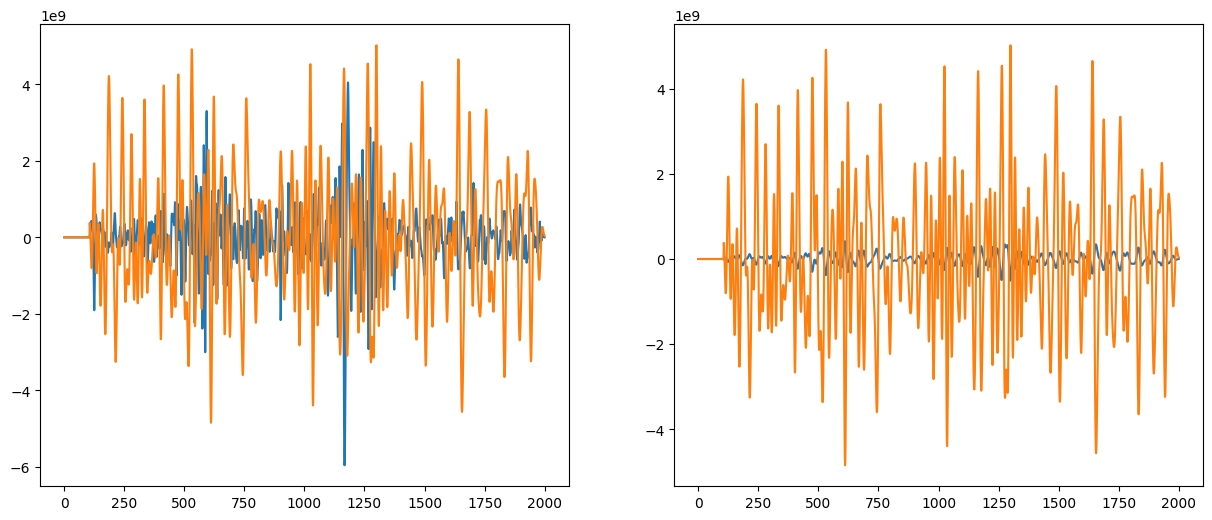

In [169]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(gather[number_trace])
plt.plot(approx_real_signal_1d_nlms)

plt.subplot(1, 2, 2)
plt.plot(model[number_trace])
plt.plot(approx_real_signal_1d_nlms)


plt.show()

# Мой RLS метод:

In [170]:
approx_real_weights_1d_rls = ps.RLS(model_agc[number_trace], gather[number_trace], 2, 0.99).flatten()
print(approx_real_weights_1d_rls, approx_real_weights_1d_rls.shape)

[ 97670.94297857 -52196.48710471] (2,)


In [171]:
approx_real_signal_1d_rls = ps.processing_of_signal(model_agc[number_trace], approx_real_weights_1d_rls)

# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_rls, model[number_trace]):.1e}") 
print(f"MSE = {ps.MSE(approx_real_signal_1d_rls, model[number_trace]):.10e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_rls, model[number_trace]):.1e}") 
print(f"ME = {ps.ME(approx_real_signal_1d_rls, model[number_trace]):.10e}")

(2001,) (2,)
MSE = 3.1869799798e+16
ME = 1.3733460800e+08


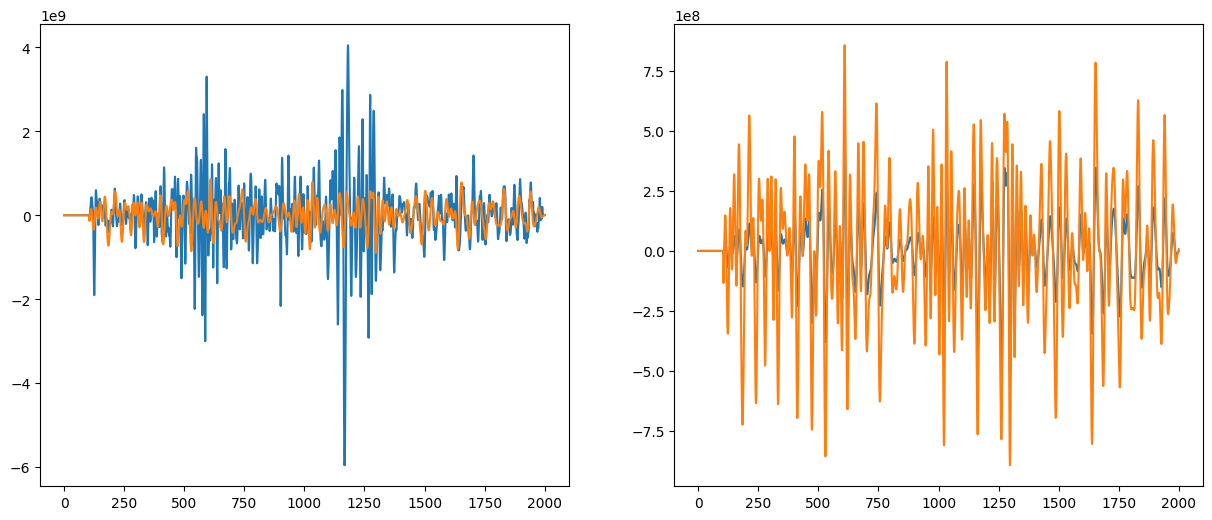

In [172]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(gather[number_trace])
plt.plot(approx_real_signal_1d_rls)

plt.subplot(1, 2, 2)
plt.plot(model[number_trace])
plt.plot(approx_real_signal_1d_rls)


plt.show()

# Padasip NLMS метод:

In [173]:
number_of_weights_p_nlms = 2

In [174]:
first_input_1d = pa.input_from_history(model_agc[number_trace], number_of_weights_p_nlms)
second_input_1d = gather[number_trace]

In [175]:
f = pa.filters.FilterNLMS(n=number_of_weights_p_nlms, mu=2*0.5, eps=1, w="zeros")
y, e, w = f.run(second_input_1d[:-(number_of_weights_p_nlms-1)], first_input_1d)

In [176]:
approx_weights_1d_p_nlms = w[-1]
print(approx_weights_1d_p_nlms)

[ 164678.78187866 -209872.25896657]


In [177]:
approx_real_signal_1d_p_nlms = ps.processing_of_signal(model_agc[number_trace], approx_weights_1d_p_nlms)

# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_p_nlms, model[number_trace]):.1e}") 
print(f"MSE = {ps.MSE(approx_real_signal_1d_p_nlms, model[number_trace]):.10e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_p_nlms, model[number_trace]):.1e}") 
print(f"ME = {ps.ME(approx_real_signal_1d_p_nlms, model[number_trace]):.10e}")

(2001,) (2,)
MSE = 2.0193103134e+17
ME = 3.4396214400e+08


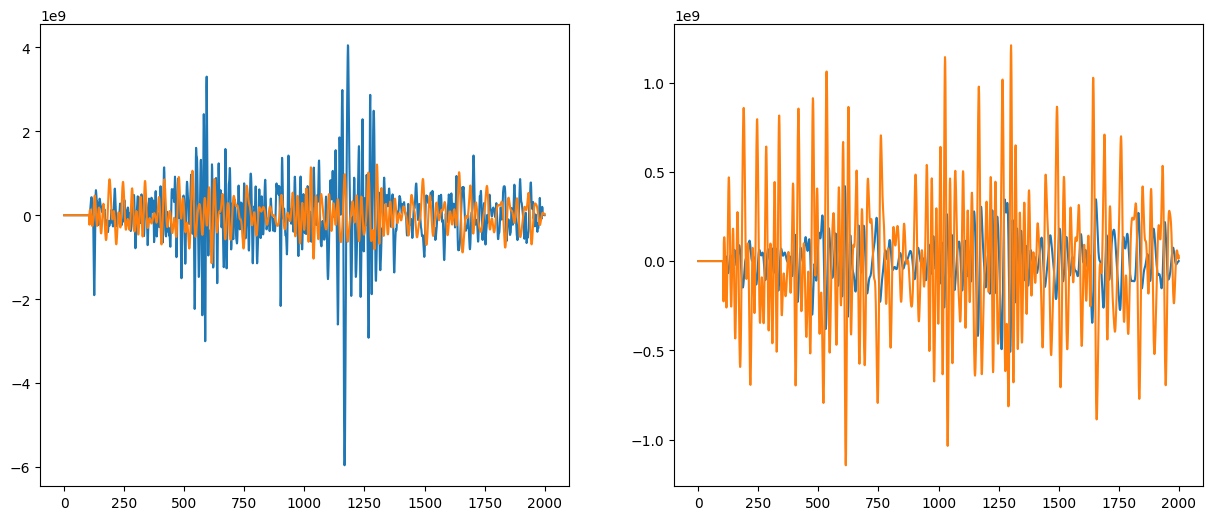

In [178]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(gather[number_trace])
plt.plot(approx_real_signal_1d_p_nlms)

plt.subplot(1, 2, 2)
plt.plot(model[number_trace])
plt.plot(approx_real_signal_1d_p_nlms)


plt.show()

# Padasip RLS метод:

In [179]:
number_of_weights_p_rls = 2

In [180]:
f = pa.filters.FilterRLS(n=number_of_weights_p_rls, mu=0.99, w="zeros")
y, e, w = f.run(second_input_1d[:-1], first_input_1d)

In [181]:
approx_weights_1d_p_rls = w[-1]
print(approx_weights_1d_p_rls)

[141805.60953146 -99630.8393347 ]


In [182]:
approx_real_signal_1d_p_rls = ps.processing_of_signal(model_agc[number_trace], approx_weights_1d_p_rls)

# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_p_rls, model[number_trace]):.1e}") 
print(f"MSE = {ps.MSE(approx_real_signal_1d_p_rls, model[number_trace]):.15e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_p_rls, model[number_trace]):.1e}") 
print(f"ME = {ps.ME(approx_real_signal_1d_p_rls, model[number_trace]):.15e}")

(2001,) (2,)
MSE = 3.953330994387354e+16
ME = 1.532071680000000e+08


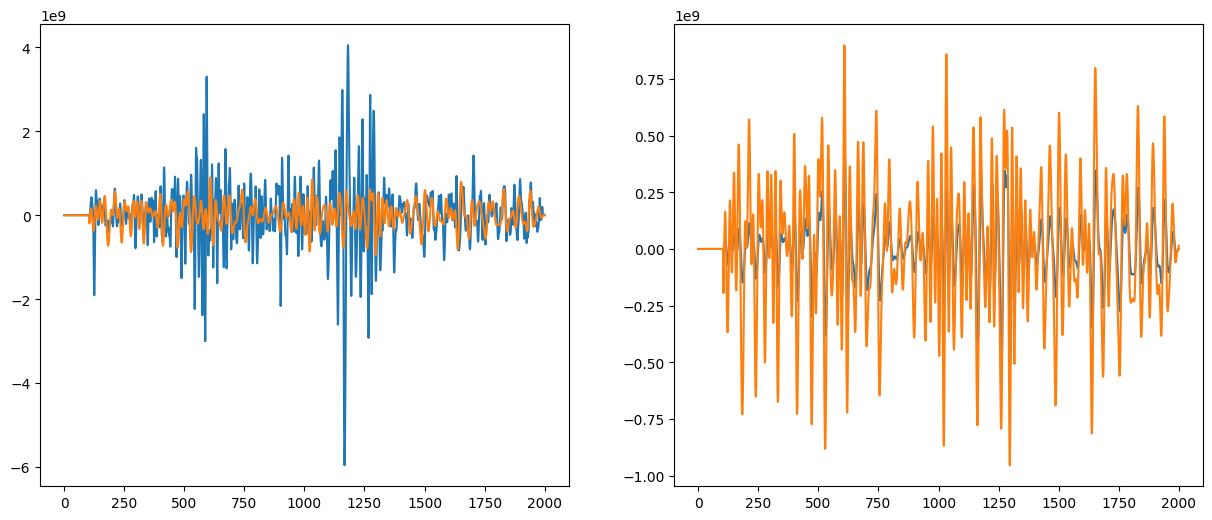

In [183]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(gather[number_trace])
plt.plot(approx_real_signal_1d_p_rls)

plt.subplot(1, 2, 2)
plt.plot(model[number_trace])
plt.plot(approx_real_signal_1d_p_rls)


plt.show()

# Общие выводы

In [184]:
print("My NLMS")
print(f"MSE = {ps.MSE(approx_real_signal_1d_nlms, model[number_trace]):.3e}")
print(f"ME = {ps.ME(approx_real_signal_1d_nlms, model[number_trace]):.3e}")
print("Padasip NLMS")
print(f"MSE = {ps.MSE(approx_real_signal_1d_p_nlms, model[number_trace]):.3e}")
print(f"ME = {ps.ME(approx_real_signal_1d_p_nlms, model[number_trace]):.3e}")
print("My RLS")
print(f"MSE = {ps.MSE(approx_real_signal_1d_rls, model[number_trace]):.3e}")
print(f"ME = {ps.ME(approx_real_signal_1d_rls, model[number_trace]):.3e}")
print("Padasip RLS")
print(f"MSE = {ps.MSE(approx_real_signal_1d_p_rls, model[number_trace]):.3e}")
print(f"ME = {ps.ME(approx_real_signal_1d_p_rls, model[number_trace]):.3e}")

My NLMS
MSE = 3.135e+18
ME = 1.361e+09
Padasip NLMS
MSE = 2.019e+17
ME = 3.440e+08
My RLS
MSE = 3.187e+16
ME = 1.373e+08
Padasip RLS
MSE = 3.953e+16
ME = 1.532e+08
